In [17]:
import connect_to_db as cn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
result_list = []

for is_score in range(1, 4):
    part_list = []
    for es_score in range(1, 4):
        sql = f"select count(*) from comments where is_score={is_score} and es_score={es_score};"
        result_df = cn.select_query_result_to_df(sql)
        part_list.append(int(result_df['count(*)'][0]))
    result_list.append(part_list)
    
print(result_list)

0    906243
Name: count(*), dtype: int64
<class 'int'>
0    1283866
Name: count(*), dtype: int64
<class 'int'>
0    734398
Name: count(*), dtype: int64
<class 'int'>
0    429618
Name: count(*), dtype: int64
<class 'int'>
0    364274
Name: count(*), dtype: int64
<class 'int'>
0    273827
Name: count(*), dtype: int64
<class 'int'>
0    290495
Name: count(*), dtype: int64
<class 'int'>
0    73681
Name: count(*), dtype: int64
<class 'int'>
0    95802
Name: count(*), dtype: int64
<class 'int'>
[[906243, 1283866, 734398], [429618, 364274, 273827], [290495, 73681, 95802]]


In [26]:
result_df = pd.DataFrame(result_list)
result_df = result_df.rename(columns={0: 'es score 1'}, index={0: 'is score 1'})
result_df = result_df.rename(columns={1: 'es score 2'}, index={1: 'is score 2'})
result_df = result_df.rename(columns={2: 'es score 3'}, index={2: 'is score 3'})
print(result_df)

            es score 1  es score 2  es score 3
is score 1      906243     1283866      734398
is score 2      429618      364274      273827
is score 3      290495       73681       95802


In [73]:
def draw_heatmap(df, title):
    filename = title + '.png'
    sns.heatmap(df, annot=True, fmt='d', cmap='RdYlGn_r', square=True, annot_kws = {'size':14})
    plt.title(title, fontsize=16)
    
    plt.savefig(filename, dpi=300)
    plt.figure(figsize = (12,6))
    
    plt.show()

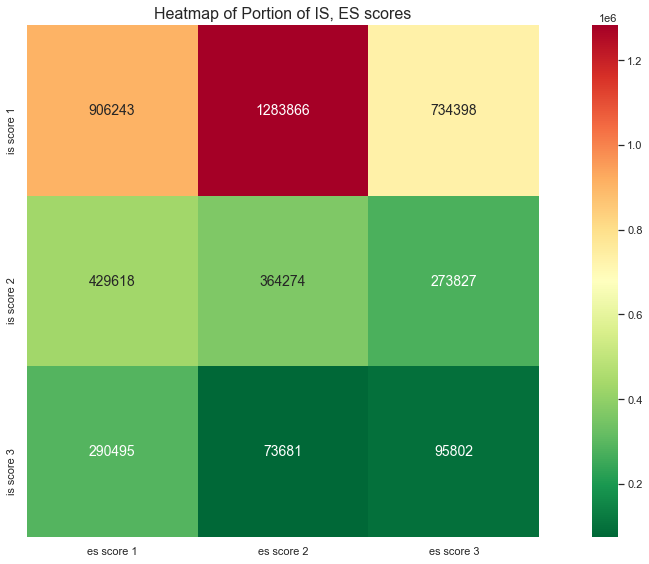

<Figure size 864x432 with 0 Axes>

In [74]:
draw_heatmap(result_df, "Heatmap of Portion of IS, ES scores")